# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | haiku-pauwela
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | n'zeto
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | karratha
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | nuevo laredo
Processing Record 15 of Set 1 | cochrane
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | asaita
Processing Record 20 of Set 1 | happy valley-goose bay
Processing Record 21 of Set 1 | susuman
Processing Record 22 of Set 1 | chonchi
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,20.57,72,80,9.80,PT,1696826775
1,haiku-pauwela,20.9219,-156.3051,25.01,74,40,6.69,US,1696826775
2,lebu,-37.6167,-73.6500,9.01,88,24,5.16,CL,1696826775
3,blackmans bay,-43.0167,147.3167,17.07,83,99,1.17,AU,1696826776
4,jamestown,42.0970,-79.2353,10.77,83,100,4.92,US,1696826488


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,20.57,72,80,9.80,PT,1696826775
1,haiku-pauwela,20.9219,-156.3051,25.01,74,40,6.69,US,1696826775
2,lebu,-37.6167,-73.6500,9.01,88,24,5.16,CL,1696826775
3,blackmans bay,-43.0167,147.3167,17.07,83,99,1.17,AU,1696826776
4,jamestown,42.0970,-79.2353,10.77,83,100,4.92,US,1696826488


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

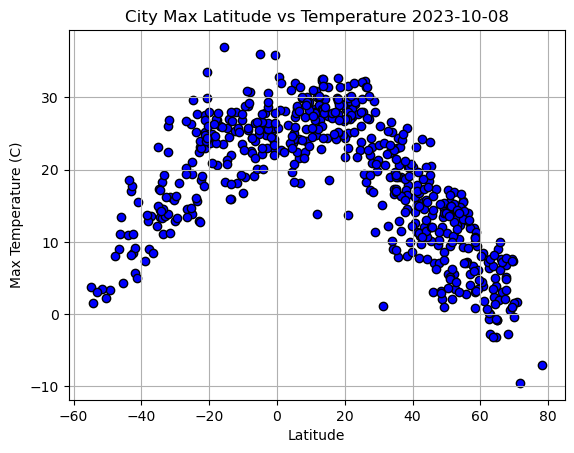

In [8]:
# Build scatter plot for latitude vs. temperature
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Max Temp"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")

plt.title(f"City Max Latitude vs Temperature {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

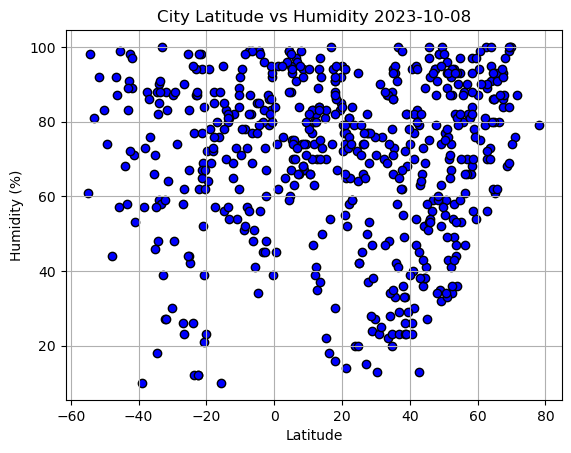

In [9]:
# Build the scatter plots for latitude vs. humidity
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Humidity"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Humidity {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

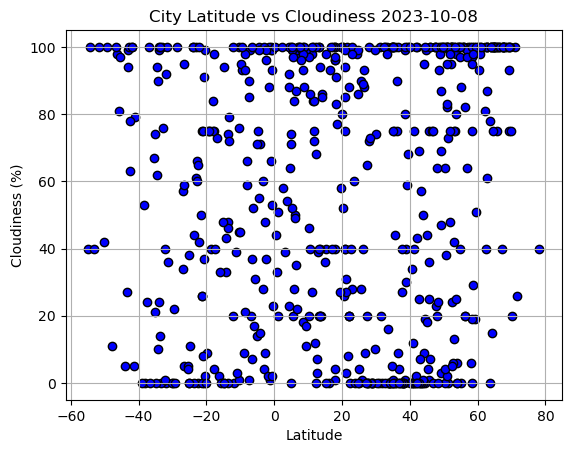

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Cloudiness"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Cloudiness {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

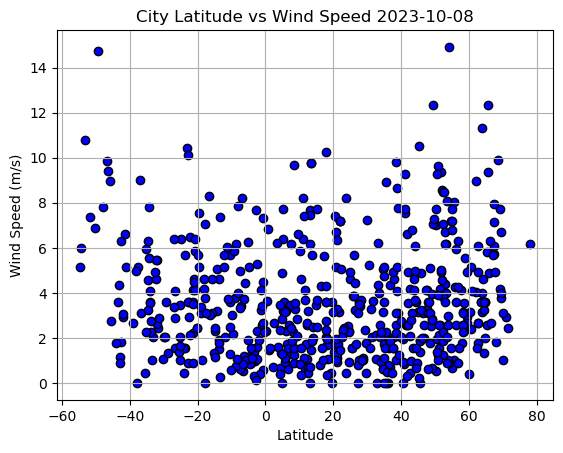

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Wind Speed"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="b", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Wind Speed {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy import stats

def Create_Linear_regression_plot(x, y, x_label, y_label, i, j):
    x = np.array(x)
    y = np.array(y)
    
    # Perform linear regression using scipy's linregress
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Calculate the regression line
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))    
    
    # Create a scatter plot of the data points
    plt.scatter(x, y, label="Data Points", color="blue")
    
    # Plot the regression line
    plt.plot(x, regress_values, label="Linear Regression", color="red")
    
    # Customize plot labels and title
    plt.xlabel(x_label if x_label else "X-axis")
    plt.ylabel(y_label if y_label else "Y-axis")
    
    plt.annotate(line_eq, (i, j), fontsize=15, color="r")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_data=[]

for k, city in enumerate(city_data):
    city_lat = float(city["Lat"])
    if city_lat >= 0:
        north_data.append({
            "City": city["City"], 
            "Lat": float(city["Lat"]), 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"],
            "City_ID": k 
        })
        
# Create a DataFrame
north_df=pd.DataFrame(north_data)

# Set "City_ID" as the index column
north_df.set_index("City_ID", inplace=True)

# Filter the DataFrame for the Northern Hemisphere
north_hemi_df = north_df[north_df["Lat"] >= 0]

# Display
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,20.57,72.0,80.0,9.80,PT,1696826775
1,haiku-pauwela,20.9219,-156.3051,25.01,74.0,40.0,6.69,US,1696826775
4,jamestown,42.0970,-79.2353,10.77,83.0,100.0,4.92,US,1696826488
7,bethel,41.3712,-73.4140,11.41,82.0,0.0,2.57,US,1696826593
8,ust-nera,64.5667,143.2000,-3.21,86.0,100.0,1.34,RU,1696826777


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_data=[]

for k, city in enumerate(city_data):
    city_lat = float(city["Lat"])
    if city_lat < 0:
        south_data.append({
            "City": city["City"], 
            "Lat": float(city["Lat"]), 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"],
            "City_ID": k 
        })
        
# Create a DataFrame
south_df=pd.DataFrame(south_data)

# Set "City_ID" as the index column
south_df.set_index("City_ID", inplace=True)

# Filter the DataFrame for the Southern Hemisphere
south_hemi_df = south_df[south_df["Lat"] < 0]

# Display sample data for the Southern Hemisphere
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lebu,-37.6167,-73.6500,9.01,88.0,24.0,5.16,CL,1696826775
3,blackmans bay,-43.0167,147.3167,17.07,83.0,99.0,1.17,AU,1696826776
5,port-aux-francais,-49.3500,70.2167,3.30,74.0,100.0,14.73,TF,1696826776
6,n'zeto,-7.2312,12.8666,24.41,87.0,99.0,3.42,AO,1696826776
11,karratha,-20.7377,116.8463,33.55,21.0,0.0,5.86,AU,1696826777


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7388980910259363


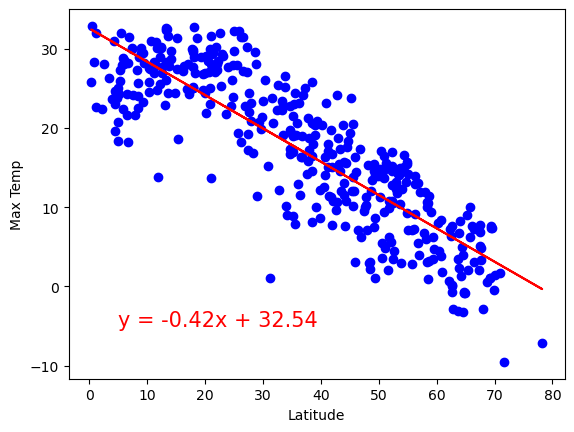

In [15]:
# Linear regression on Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [temp["Max Temp"] for temp in north_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = 5
j = -5
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.6009373929793055


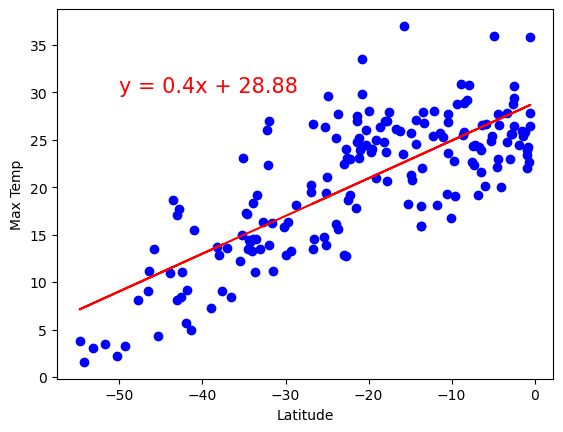

In [16]:
# Linear regression on Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [temp["Max Temp"] for temp in south_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = -50
j = 30
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0025498842947512


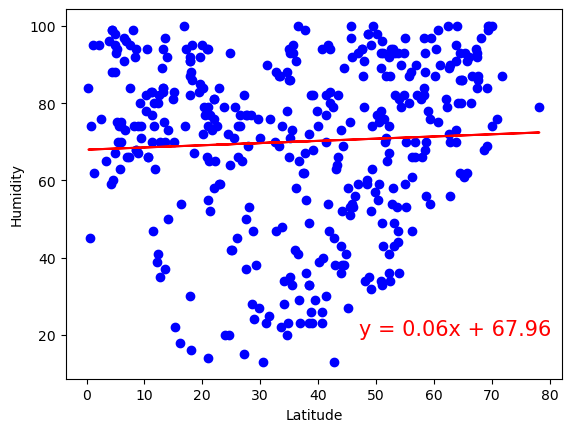

In [17]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [humidity["Humidity"] for humidity in north_data]
x_lable ="Latitude"
y_lable="Humidity"
i = 47
j = 20
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.00222066721921506


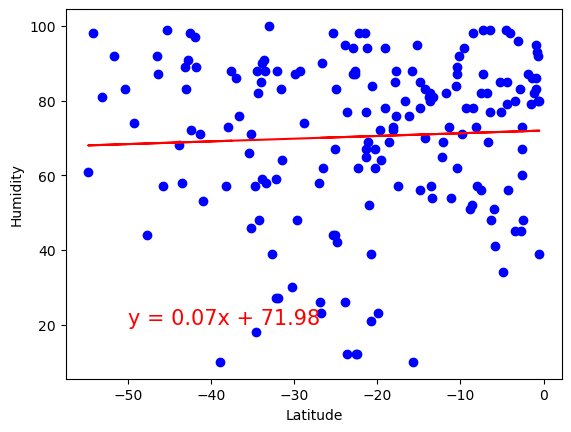

In [18]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [humidity["Humidity"] for humidity in south_data]
x_lable ="Latitude"
y_lable="Humidity"
i = -50
j = 20
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013677054966489586


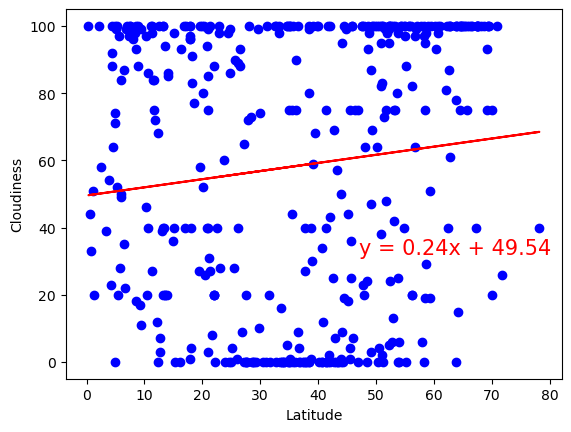

In [26]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [cloudiness["Cloudiness"] for cloudiness in north_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = 47
j = 32
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.0010988979761808266


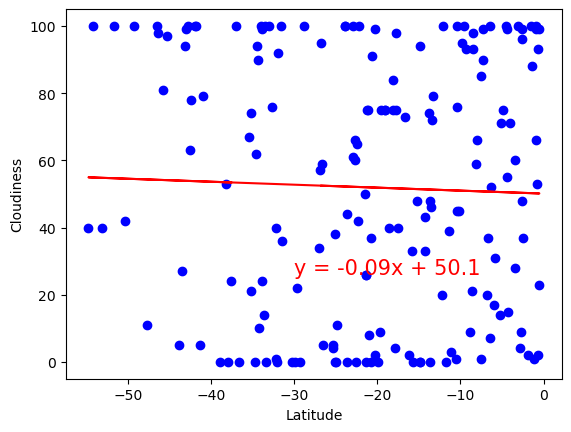

In [24]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [cloudiness["Cloudiness"] for cloudiness in south_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = -30
j = 26
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03789323194438532


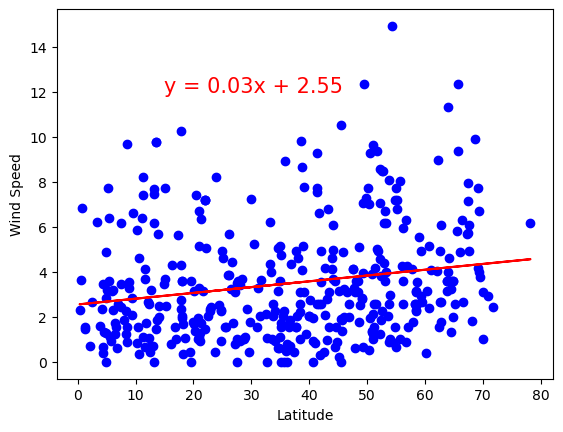

In [21]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in north_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = 15
j = 12
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.10526814199754121


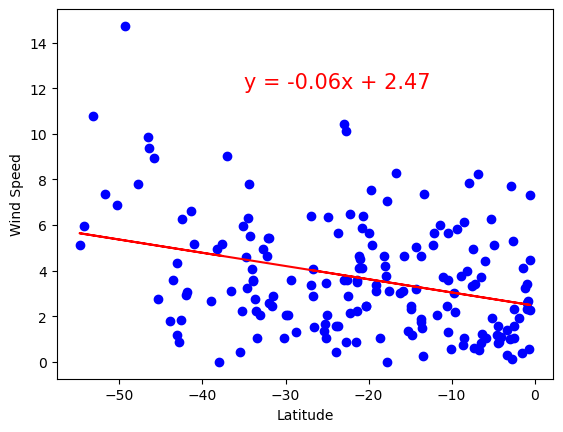

In [22]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in south_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = -35
j = 12
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE